In [32]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# Linear solver
def my_linfit(x,y):
    ySummation = sum(y)/len(y)
    xSummation = sum(x)/len(x)
    xySummation = sum(x*y)/len(x)
    xSqareSummation = sum(x*x)/len(x)

    b=  ((ySummation*xSqareSummation) - (xySummation*xSummation)) / (xSqareSummation - (xSummation*xSummation))
    a = (xySummation - (b * xSummation))/xSqareSummation     
    return a,b

In [34]:
def main():
    # Main
    x = np.array([])
    y = np.array([])
    for ix,iy in coords:
        x = np.append(x,ix)
        y = np.append(y,iy)
    
    #To test that the equation is correct, the below code can be uncommented to test slope and intercept of any specific points.
    #x = np.array([3, 2.5,1,-4.2,15])
    #y = np.array([-2.7, 0.01,1,-2.2,13])

    a,b = my_linfit(x,y)
    yPoints = np.ones(1000)
    xPoints = np.arange(0,1000,1)
    for i in range(0,1000):
        # y = ax + b 
        yPoints[i] = (a*xPoints[i]) + b
    title = f'My fit: a={round(a,4)} and b={round(b,4)}'
    plt.title(title)
    plt.plot(xPoints,yPoints,'k')
    plt.ioff() 
    plt.show()
    

<IPython.core.display.Javascript object>


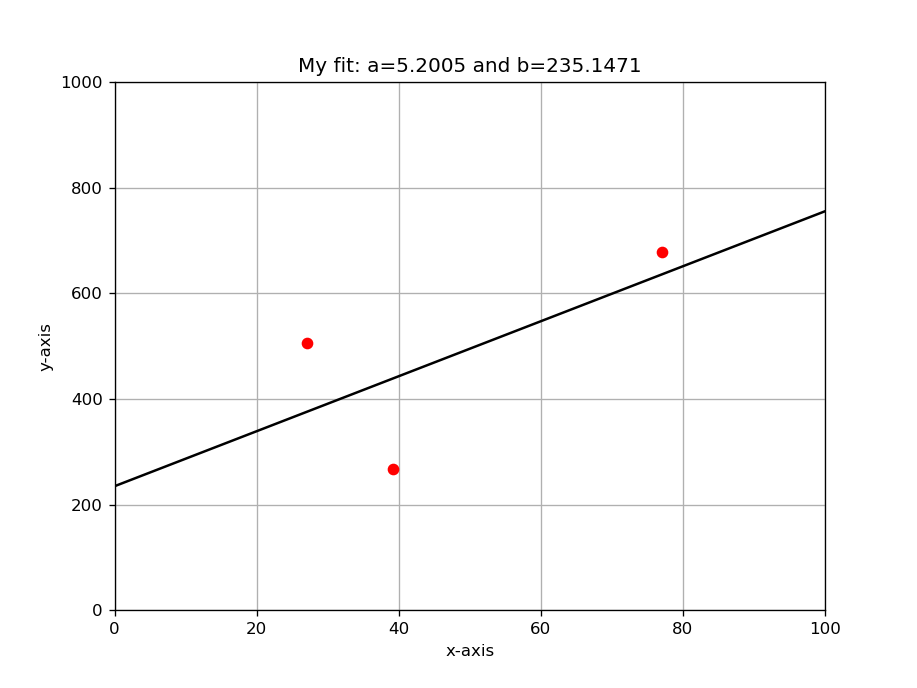

In [35]:
# Taking number of points from user and displaying the line accordingly
%matplotlib notebook
fig = plt.figure()
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Left click M times to add points, right click to stop')
plt.axis([0,100,0,1000])
plt.grid(True)
coords = []
plt.ion()

def onclick(event):
    #On left click add points
    if event.button == 1:
        global ix, iy
        ix, iy = event.xdata, event.ydata
        plt.plot(ix,iy, linestyle='--', marker='o', color='r')
        global coords
        coords.append((ix, iy))
    #Right click to display linear regression line
    elif event.button == 3: 
        main()
       
cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()